## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
sns.set()

## Bar Chart Homework Task I - Create a Horizontal Bar Chart

### Your homework task is to use the data set from the section and create a Horizontal Bar Chart. In essence, the information on the chart will remain the same. But you’ll have swapped the x- and y-axis of the chart.
### This is your chance to explore the software, so you try out different options. For instance, choosing another color for the chart or exploring alternative chart formatting options.
### Tip: 	Python - in Matplotlib the barh() function creates a horizontal bar chart.  


In [2]:
raw_data = pd.read_csv('bar-chart-data.csv')
raw_data

,Brand,Cars Listings
0,Audi,419
1,BMW,636
2,Mercedes-Benz,820
3,Mitsubishi,306
4,Renault,438
5,Toyota,509
6,Volkswagen,875


In [3]:
df = raw_data.copy()

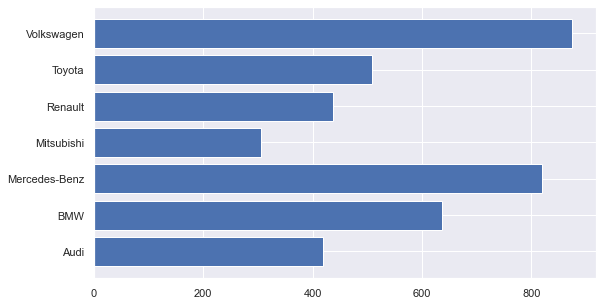

In [4]:
plt.figure(figsize=(9,5))
plt.barh(df['Brand'],
         df['Cars Listings'])

plt.show()

## Bar Chart Homework Task II - Create Bar Chart of Ice Cream Shop Sales

### You have a frequency distribution table with all the sales of an ice cream shop chain across four cities. Your task is to create a bar chart of the data. 

### Step 1: Create the chart.
### Step 2: Make sure your chart has sufficient labeling and is well styled.
### Step 3: Interpret the chart.

In [5]:
raw_data = pd.read_csv('bar-chart-data2.csv')
raw_data.head()

,Cities,Frequency
0,New York,12327
1,LA,17129
2,San Francisco,19923
3,Total,49379


In [6]:
df = raw_data.copy()
# drop total
df = df.drop(index=3, axis=1)
print(df.head())

          Cities  Frequency
0       New York      12327
1             LA      17129
2  San Francisco      19923


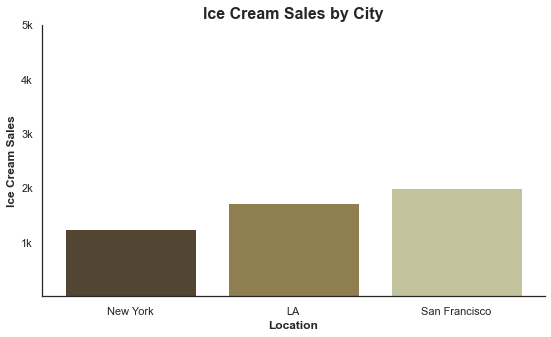

In [7]:
sns.set_style('white')
colors = ['#524632', '#8F7E4F', '#C3C49E', '#DEDBD8']
labels = ['NY', 'SF', 'LA']

plt.figure(figsize=(9,5))
plt.bar(df['Cities'],
        df['Frequency'],
       color=colors)
plt.ylabel('Ice Cream Sales', fontsize=12, fontweight='bold')
plt.xlabel('Location', fontsize=12, fontweight='bold')
plt.yticks(ticks=[(10000 * n) for n in range(1,6)],
           labels=[(str(n) + 'k') for n in range(1,6)])
plt.title('Ice Cream Sales by City', fontsize=16, fontweight='bold')

sns.despine()

plt.show()

# interpretation
# SF has the most ice cream sales

## Area Chart Homework I

### Create a stacked area chart using all four engine type categories on the chart. They are Gas, Petrol, Diesel, Other.
### Think about the order in which you’ll display the categories.
### Consider the colors, which would fit your graph.
### Finally, think about a setting in which you’d be required to present all four categories from the data. What would be the interpretation of your newly created chart?


In [8]:
raw_data = pd.read_csv('stacked-area-chart-data.csv')
raw_data.head()

,Year,Gas,Petrol,Diesel,Other
0,1982,0,94,0,0
1,1983,0,347,0,0
2,1984,300,0,334,0
3,1985,1030,1184,984,0
4,1986,511,681,1066,340


In [9]:
df = raw_data.copy()

# use totals col to sort
df2 = raw_data.copy()
df2 = df2.drop(columns=['Year'])
col_totals = [df2[col].sum() for col in df2.columns]
df2.loc[len(df.index)] = col_totals
df2 = df2.sort_values(by=(len(df2.index)-1), ascending=False, axis=1)
print(df2.to_string(max_rows=10))

labels = df2.columns.to_list()
print('highest to lowest totals:',labels)

    Diesel  Petrol     Gas  Other
0        0      94       0      0
1        0     347       0      0
2      334       0     300      0
3      984    1184    1030      0
4     1066     681     511    340
..     ...     ...     ...    ...
31   16255    6517    1055    607
32    4703    1942     409    329
33    1172     702      50    125
34     220     108       0     25
35  348684  209046  117695  23646
highest to lowest totals: ['Diesel', 'Petrol', 'Gas', 'Other']


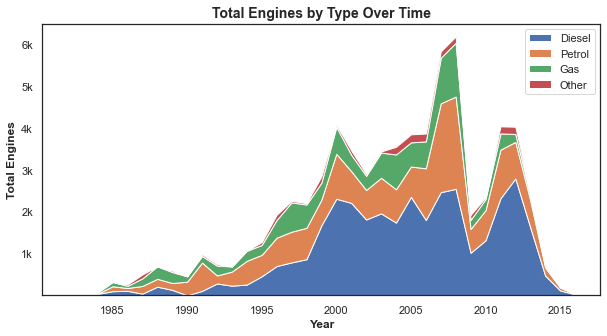

In [10]:
plt.figure(figsize=(10,5))
plt.stackplot(df['Year'],
             df['Diesel'],
              df['Petrol'],
             df['Gas'],
             df['Other'])
plt.legend(labels=labels)
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Total Engines', fontsize=12, fontweight='bold')
plt.yticks(ticks=[(10000 * n) for n in range(1,7)],
           labels=[(str(n) + 'k') for n in range(1,7)])
plt.title(label='Total Engines by Type Over Time', fontsize=14, fontweight='bold')

plt.show()

# interpretation
# Diesel has seen the largest total sales over the years
# there was a large spike in petrol and gas in 2007

## Area Chart Homework II - Create an Area Chart of a Company's Revenue

### Your homework task is to create a stacked area chart of a printer company and its revenue for the last 12 months. The data set contains monthly values in the span of a year and features three revenue sources:
### -	International Printer Sales
### -	Domestic Printer Sales
### -	Services (fixed fee)
### Think about the ordering of the categories, as well as the appropriate colors when displaying your chart. After you’ve completed the chart think about interpretation. What does the chart show? Which would you say is the most important revenue source for the business and why? How does the performance of the company look when considering the Date factor?



In [11]:
raw_data = pd.read_csv('area-chart-hw-data.csv')
raw_data.head()

,Date,International,Domestic,Services
0,1/28/2020,3200,300,2000
1,2/28/2020,4500,500,2000
2,3/28/2020,3000,600,2000
3,4/28/2020,2800,500,2000
4,5/28/2020,5300,400,2000


In [12]:
df = raw_data.copy()
print(df.info())

# extract month
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = [df['Date'][n].month for n in range(len(df['Date']))]
print(df.info())

print('max', df.max())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           12 non-null     object
 1   International  12 non-null     int64 
 2   Domestic       12 non-null     int64 
 3   Services       12 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Date           12 non-null     int64
 1   International  12 non-null     int64
 2   Domestic       12 non-null     int64
 3   Services       12 non-null     int64
dtypes: int64(4)
memory usage: 512.0 bytes
None
max Date               12
International    5500
Domestic          700
Services         2000
dtype: int64


In [13]:
# use totals col to sort
df2 = raw_data.copy()
df2 = df2.drop(columns=['Date'])
col_totals = [df2[col].sum() for col in df2.columns]
df2.loc[len(df.index)] = col_totals
df2 = df2.sort_values(by=(len(df2.index)-1), ascending=False, axis=1)
print(df2.to_string(max_rows=10))

labels = df2.columns.to_list()
print('highest to lowest totals:',labels)

    International  Services  Domestic
0            3200      2000       300
1            4500      2000       500
2            3000      2000       600
3            2800      2000       500
4            5300      2000       400
..            ...       ...       ...
8            3400      2000       500
9            5000      2000       600
10           5500      2000       500
11           4700      2000       700
12          47200     24000      5960
highest to lowest totals: ['International', 'Services', 'Domestic']


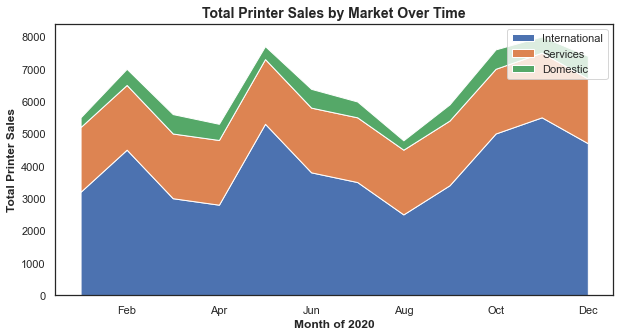

In [14]:
plt.figure(figsize=(10,5))
plt.stackplot(df['Date'],
             df['International'],
              df['Services'],
             df['Domestic'])
plt.legend(labels=labels)
plt.xlabel('Month of 2020', fontsize=12, fontweight='bold')
plt.xticks(ticks=[2,4,6,8,10,12],
      labels=['Feb', 'Apr', 'Jun', 'Aug', 'Oct', 'Dec'])
plt.ylabel('Total Printer Sales', fontsize=12, fontweight='bold')
# plt.yticks(ticks=[(1000 * n) for n in range(1,7)],
#            labels=[(str(n) + 'k') for n in range(1,7)])
plt.title(label='Total Printer Sales by Market Over Time', fontsize=14, fontweight='bold')

plt.show()

# interpretation
# Diesel has seen the largest total sales over the years
# there was a large spike in petrol and gas in 2007

## Line Chart Homework - Create a Line Chart with New Index Data

### Your Homework task is to create a line chart using the new index data which is from 2010 until 2020.
### After you’ve created your line chart:
### •	Think about narrowing down the time frame to a more specific period.
### •	Think about the interpretation of the chart with a specific time frame. Why have you chosen this period, specifically? What would you tell your audience or your colleagues if you were presenting this chart?


In [40]:
raw_data = pd.read_csv('line-hw-data.csv')
raw_data

,Date,GSPCRet,FTSERet
0,1/1/2010,0.000000,0.000000
1,1/4/2010,-0.008912,0.000000
2,1/5/2010,0.014419,0.016147
3,1/6/2010,0.002693,0.004036
4,1/7/2010,0.000493,0.001358
...,...,...,...
2626,1/27/2020,-0.025784,0.010429
2627,1/28/2020,0.002522,-0.022924
2628,1/29/2020,0.010478,0.009255
2629,1/30/2020,-0.010035,0.000388


In [30]:
df = raw_data.copy()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2631 entries, 0 to 2630
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2631 non-null   object 
 1   GSPCRet  2631 non-null   float64
 2   FTSERet  2631 non-null   float64
dtypes: float64(2), object(1)
memory usage: 61.8+ KB
None


In [17]:
# labels = ['S&P500', 'FTSE100']

# plt.figure(figsize=(20,8))
# plt.plot(df['Date'],
#         df['GSPCRet'],
#         color='midnightblue')
# plt.plot(df['Date'],
#         df['FTSERet'],
#         color='crimson')
# plt.title('S&P vs FTSE', fontsize=14, fontweight='bold')
# plt.ylabel('Returns')
# plt.xlabel('Date')
# plt.legend(labels=labels, fontsize='large')

# plt.show()


KeyboardInterrupt



In [51]:
df2 = raw_data.copy()

In [54]:
import datetime as dt

# convert to date
df2['Date'] = pd.to_datetime(df2['Date'])

# locate
df2 = df2.loc[(df2['Date'] >= dt.datetime(year=2019, month=6, day=1))]
print(df2['Date'].max())
print(df2['Date'].min())

2020-01-31 00:00:00
2019-06-03 00:00:00


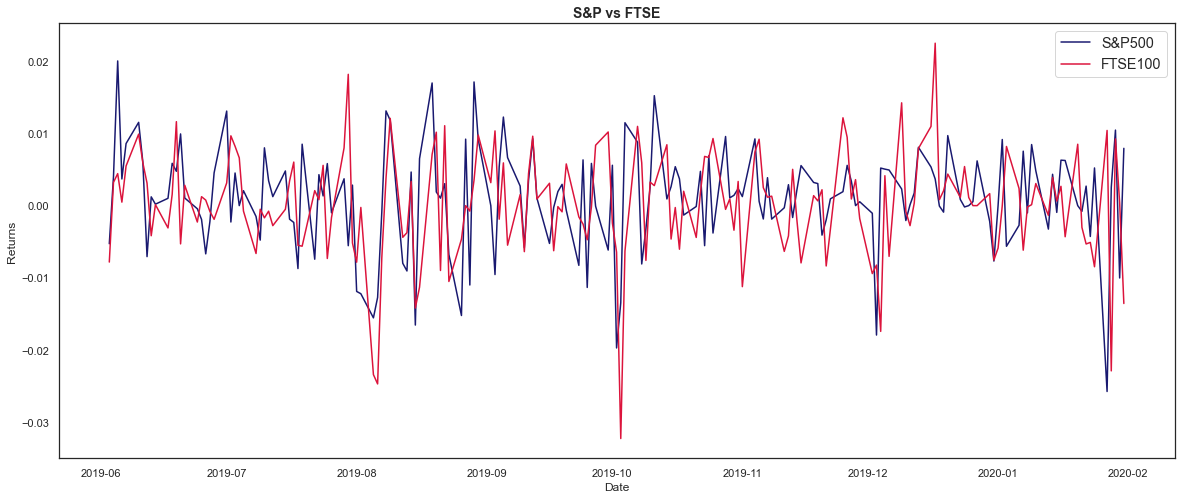

In [55]:
labels = ['S&P500', 'FTSE100']

plt.figure(figsize=(20,8))
plt.plot(df2['Date'],
        df2['GSPCRet'],
        color='midnightblue')
plt.plot(df2['Date'],
        df2['FTSERet'],
        color='crimson')
plt.title('S&P vs FTSE', fontsize=14, fontweight='bold')
plt.ylabel('Returns')
plt.xlabel('Date')
plt.legend(labels=labels, fontsize='large')

plt.show()

## Histogram Homework Task - Create a Histogram Showing Distribution of Age

### The data set for this assignment contains a survey of geodemographic features among 2000 participants. Your task is to create a histogram based on the Age variable in the data.
### •	Decide on how many bins or what intervals lengths are appropriate for the histogram
### •	What is the data distribution? What insight can you gain about the age/age groups of the participants in the survey?
### •	Don’t forget to format your chart by improving the colors and including proper chart labeling.

In [79]:
raw_data = pd.read_csv('hist-hw-data.csv')
raw_data

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [81]:
df = raw_data.copy()

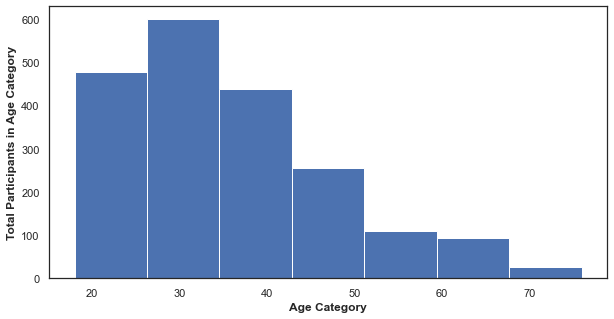

In [86]:
plt.figure(figsize=(10,5))
plt.hist(x=df['Age'],
        bins=7)
plt.xlabel('Age Category', fontsize=12, fontweight='bold')
plt.ylabel('Total Participants in Age Category', fontsize=12, fontweight='bold')
plt.show()

## Scatter Plot Homework Task - Create a Scatter Plot of Student Scores

### Your task is to plot the GPA and SAT student scores using a scatter plot.
### •	Decide which will be your x- and y-axis
### •	Think about chart interpretation. What is the relationship between these variables?
### •	Consider altering the chart limits, so the y-axis doesn’t start from 0. 

In [90]:
raw_data = pd.read_csv('scatter-hw-data.csv')
raw_data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [92]:
df = raw_data.copy()

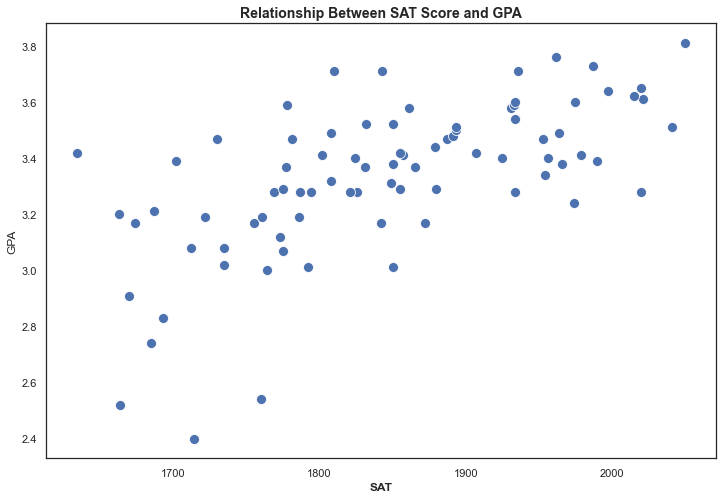

In [93]:
# ----- seaborn
plt.figure(figsize=(12,8))
sns.scatterplot(x=df['SAT'],
               y=df['GPA'],
               palette=['orange', 'blue'],
               s=100)
# paste from matplotlib above... same code
plt.title('Relationship Between SAT Score and GPA',
          fontsize=14, fontweight='bold')
plt.xlabel('SAT', weight='bold')
plt.ylabel('GPA')

plt.show()

## Regression Plot Homework Task - Regression Plot of Auto Insurance in Sweden

### Create a regression plot on the data set of car insurance in Sweden.
### •	Decide which is your x- and which your y-axis
### •	What is the relationship between the two variables?
### •	How would you interpret the chart?
### •	What would be an appropriate chart title?

In [96]:
raw_data = pd.read_csv('regression-data.csv')
raw_data

,Budget,Sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9
...,...,...
195,55.7,7.6
196,107.2,9.7
197,192.7,12.8
198,391.8,25.5


In [97]:
df = raw_data.copy()

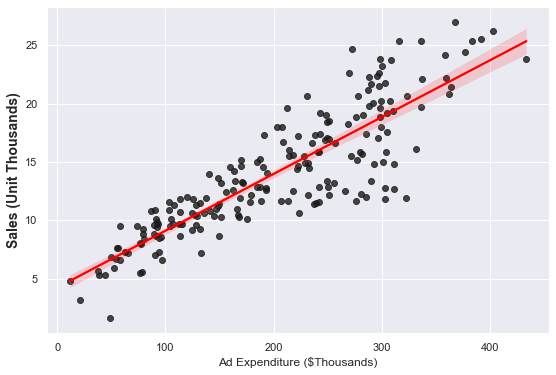

In [98]:
sns.set(rc={'figure.figsize': (9,6)})
sns.regplot(x='Budget',
           y='Sales',
           data=df,
            scatter_kws={'color': 'k'},
            line_kws={'color': 'red'})
plt.xlabel('Ad Expenditure ($Thousands)')
plt.ylabel('Sales (Unit Thousands)', fontsize=14, fontweight='bold')


plt.show()

## Bar and Line Chart Homework - Pareto Chart of Movie Goers' Complaints

### Your goal for this homework task is to create a Pareto chart. A Pareto is a specific case of a bar and line chart. The specificity comes from the fact that the bars on the Pareto bar chart are displayed in decreasing order of frequency. The line chart on the other hand always shows the cumulative frequency on a Pareto. Cumulative frequency means the sum of frequencies occurring up to this point. So, for the first element, it will show the frequency of occurrence for the first element only. For the second element it will be the sum of frequency for the first and second element, and so on. The last cumulative frequency is 100% as it is the sum of all individual frequencies.
### Related to the Pareto chart is the Pareto principle, also known as the 80/20 rule. Observed for the first time by Italian economist Wilfredo Pareto, who realized that around 80% of the land in Italy was owned by about 20% of the people. As such, this phenomenon shows that usually around 80% of problems are caused by 20% of the people. 
### Our data set for this task contains the top 5 Movie Goers complaints. Your task is to create a Pareto chart, based on the data. 
### The complaints must be ordered in decreasing order of frequency. This will represent your bar chart. 
### The cumulative frequency will be your line chart, represented as percentages. It must sum up to 100%, so your last value on the line chart must show 100%.


In [100]:
raw_data = pd.read_csv('bar-line-data2.csv')
raw_data

,Movie Theater Goers Complaints,Number of complaints,frequency
0,Poor Projection Quality,3821,0.727532
1,Bad Volume,684,0.857768
2,Screen Size,298,0.914509
3,Bad Seats,232,0.958682
4,Queues,217,1.000000


In [109]:
df = raw_data.copy()
df = df.sort_values(by='frequency', ascending=False)
print(df)

  Movie Theater Goers Complaints  Number of complaints  frequency
4                         Queues                   217   1.000000
3                      Bad Seats                   232   0.958682
2                    Screen Size                   298   0.914509
1                     Bad Volume                   684   0.857768
0        Poor Projection Quality                  3821   0.727532


Text(0.5, 1.0, 'Movie-Goer Complaints')

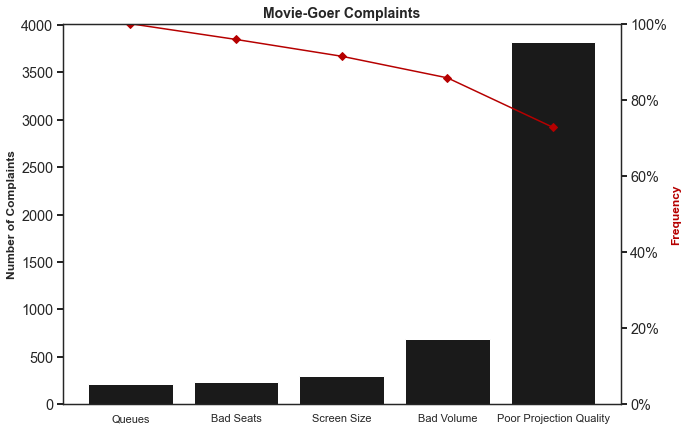

In [111]:
sns.set_style('white')

fig,ax = plt.subplots(figsize=(10,7))

# primary axis
ax.bar(df['Movie Theater Goers Complaints'],
      df['Number of complaints'],
      color='k')
ax.set_ylabel('Number of Complaints',
             weight='bold')
ax.tick_params(axis='y',
              width=2,
              labelsize='large')

# secondary axis
ax1 = ax.twinx()
# set y axis for percentages
ax1.set_ylim(0,1)
ax1.yaxis.set_major_formatter(PercentFormatter(xmax=1.0))

ax1.plot(df['Movie Theater Goers Complaints'],
        df['frequency'],
        color='#b60000',
        marker='D')
ax1.set_ylabel('Frequency',
              color='#b60000',
              weight='bold')
ax1.tick_params(axis='y',
               width=2,
               labelsize='large')
ax.set_title('Movie-Goer Complaints', fontsize=14, weight='bold')